In [ ]:
#vibo: Виталий_Бочаров_56089805 telegram(@vibo22)

<p style="align: center;"><img align=center src="https://ucarecdn.com/fc1fbe09-464b-4ae1-857f-921adde9311c/" width=900 height=200/></p>
<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ. Deep Learning (семестр 1, осень 2021): продвинутый поток</b></h3>

<h3 style="text-align: center;"><b>Итоговый проект. Телеграм-боты.  Вариант I. Перенос стиля в телеграм-ботах. </b></h3>



Куратор итогового проекта от dls: Аркадий Боков telegram (@Noath)



---



### Постановка задачи

**Техническое задание (Slack, Аркадий Боков)**

#### Вариант 1.


**Перенос стиля в телеграм-ботах:**
- Написать код простой модели, которая сможет переносить стиль с одной фотографии на другую. Можно использовать медленный алгоритм, который мы рассказывали на нашем занятии.
- Сделать бота, которому можно отправить две фотографии и получить в ответ фото с перенесенным стилем.

- *Дополнительная часть для варианта 1: Добавить возможность переносить стиль с помощью GAN'ов.* 


**Этапы работы:**

Основная часть / **Итого: 7 баллов**:

1.   Реализовать модель Neural Style Transfer (любую), перенести функциональность в класс / **2 балла (оценивается модель), блокирующий пункт (т.е., без которого проект не будет засчитан)**
2.   Написать бота, у которого будет диалог, предлагающий прислать картинки, и хэндлер, вызывающий класс из предыдущего пункта, чтобы сгенерировать ответную картинку / **1 балл (оценивается функционал бота), блокирующий пункт (т.е., без которого проект не будет засчитан) + пункты 1-2, работающие вместе - 1 балл**
3.   (опционально) Асинхронность. Если вы раньше не писали приложения для сервера, то ваш код получится не асинхронным, а именно, во время обработки картинки бот будет просто висеть и не сможет ответить другому человеку. 
Это можно исправить, но потребуется хорошее понимание фреймворка, на котором Вы пишете бота, либо же изначальное использование асинхронных фреймворков. Об этом я ещё напишу ниже / **(необязательный) - 0.5 балла**
4.   (опционально) Сделать интерфейс бота интуитивным и удобным, добавить подсказки и разные команды / **(необязательный) - 0.5 балла**
5.   (опционально, НО КРАЙНЕ РЕКОМЕНДУЕТСЯ) Deploy бота на нужном сервисе. Тут рекомендуется Heroku, т.к. он бесплатный и простой. Чуть подробнее об этом ниже / **(необязательный) - 1 балл**
6.   Описать свою работу в достаточной степени подробно, подчеркнуть, с какими трудностями столкнулись, какие решения использовали. Также этот отчёт должен содержать описание итогового результата / **1 балл, блокирующий пункт (т.е., без которого проект не будет засчитан)**



Дополнительная часть (переходить к ней только после выполнения пунктов 1-2 основной части) / **Итого: 3 балла**:

1.   Выбрать какой GAN Вы хотите использовать и какой стиль переносить. Возможно, Вы захотите сделать не совсем перенос стиля, а какую-то другую обработку картинок, что тоже принимается.
2.   Прочитать, как алгоритм работает и понять.
3.   Теперь есть два варианта:

*   Найти готовую реализацию и как-то вызывать ее из своего кода.
*   Натренировать свой GAN. Этот вариант скорее всего потребует вычислительных мощностей и времени, поэтому выбирайте его только если уверены в своих силах (и/или железе).

4.   Дописать бота, чтобы он мог использовать GAN.









---



### Модели

#### PyStiche (+)


In [ ]:
#vibo: https://github.com/pystiche/pystiche

In [ ]:
# #vibo: устанавливаем готовый модуль NST (Neural Style Transfer) 
# !pip install pystiche

In [ ]:
# #vibo: https://medium.com/pytorch/pystiche-a-framework-for-neural-style-transfer-1ea6e4825f32

# #vibo: импортируем библиотеки
# import torch
# import pystiche
# from PIL import Image
# from pystiche import demo, enc, loss, ops, optim

# #vibo: выведем версию pystiche
# print(f"pystiche == {pystiche.__version__}")

# #vibo: выбор девайса на котором будем производить расчет
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# print('device ==', device)

In [ ]:
# #vibo: используем предобученную VGG19
# multi_layer_encoder = enc.vgg19_multi_layer_encoder()
# print(multi_layer_encoder)

In [ ]:
# content_layer = "relu4_2"
# encoder = multi_layer_encoder.extract_encoder(content_layer)
# #vibo: выдает предупреждение
# #content_loss = ops.FeatureReconstructionOperator(encoder)
# content_loss = pystiche.loss.FeatureReconstructionLoss(encoder)

In [ ]:
# style_layers = ("relu1_1", "relu2_1", "relu3_1", "relu4_1", "relu5_1")
# style_weight = 1e3

# def get_encoding_op(encoder, layer_weight):
#     #vibo: выдает предупреждение
#     #return ops.GramOperator(encoder, score_weight=layer_weight)
#     return pystiche.loss.GramLoss(encoder, score_weight=layer_weight)

# #vibo: выдает предупреждение
# #style_loss = ops.MultiLayerEncodingOperator(multi_layer_encoder, style_layers, get_encoding_op, score_weight=style_weight)
# style_loss = pystiche.loss.MultiLayerEncodingLoss(multi_layer_encoder, style_layers, get_encoding_op, score_weight=style_weight)

In [ ]:
# criterion = loss.PerceptualLoss(content_loss, style_loss).to(device)
# print(criterion)

In [ ]:
# #vibo: загружаем demo и устанавливаем максимальный размер картинки
# size = 500
# images = demo.images()
# content_image = images["bird1"].read(size=size, device=device)

In [ ]:
# #vibo: читаем полученную от пользователя первую картинку
# content_image = Image.open('/content/content_image.jpg')

# import torchvision.transforms as transforms

# #normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

# transforms_image=transforms.Compose([transforms.Resize(512), transforms.CenterCrop(512), transforms.ToTensor()])

# content_image=transforms_image(content_image)

In [ ]:
# criterion.set_content_image(content_image.to(device))

In [ ]:
# import matplotlib.pyplot as plt
# from torchvision import transforms

# unloader = transforms.ToPILImage()  # reconvert into PIL image

# plt.ion()

# def imshow(tensor, title=None):
#     image = tensor.cpu().clone()  # we clone the tensor to not do changes on it
#     image = image.squeeze(0)      # remove the fake batch dimension
#     image = unloader(image)
#     plt.imshow(image)
#     if title is not None:
#         plt.title(title)
#     plt.pause(0.001) # pause a bit so that plots are updated

In [ ]:
# imshow(content_image)

In [ ]:
# #vibo: загрузка demo
# style_image = images["paint"].read(size=size, device=device)
# criterion.set_style_image(style_image)

In [ ]:
# #vibo: читаем вторую, полученную от пользователя картинку
# style_image = Image.open('/content/style_image.jpg')
# style_image=transforms_image(style_image)
# criterion.set_style_image(style_image.to(device))

In [ ]:
# imshow(style_image)

In [ ]:
# input_image = content_image.to(device).clone()
# output_image = optim.image_optimization(input_image, criterion, num_steps=500)

In [ ]:
# imshow(output_image)

In [ ]:
# #vibo: сохраняем картинку
# output_image = unloader(output_image)
# output_image.save('output_image.jpg')

#### Magic Framework (-)

In [ ]:
# !pip3 install magic_framework

In [ ]:
#   #vibo: как не примут
# import matplotlib.pyplot as plt
# from magic_framework import NST

# def magic_style_transfer(*args, **kwargs):
#     style = plt.imread(...)
#     content = plt.imread(...)
#     model = NST(...)
    
#     result = model(style, content)
#     return result

#### Pytorch_AdaIN (-)

In [ ]:
#vibo: https://github.com/irasin/Pytorch_AdaIN

#### DLS-base-line (+)

In [ ]:
#vibo: импортируем бибилотеки base_line
import os
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import torchvision.transforms as tt
import torch
import torch.nn as nn
import cv2
from tqdm.notebook import tqdm
from torchvision.utils import save_image
from torchvision.utils import make_grid
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(style='darkgrid', font_scale=1.2)

In [ ]:
!pip3 install torch torchvision
!pip3 install pillow==4.1.1


Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/base_command.py", line 180, in _main
    status = self.run(options, args)
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/req_command.py", line 199, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/commands/install.py", line 319, in run
    reqs, check_supported_wheels=not options.target_dir
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/resolution/resolvelib/resolver.py", line 128, in resolve
    requirements, max_rounds=try_to_avoid_resolution_too_deep
  File "/usr/local/lib/python3.7/dist-packages/pip/_vendor/resolvelib/resolvers.py", line 473, in resolve
    state = resolution.resolve(requirements, max_rounds=max_rounds)
  File "/usr/local/lib/python3.7/dist-packages/pip/_vendor/resolvelib/resolvers.py", line 341, in resolve
    name, crit = self._merge_into_criterion(r, parent=None)
  File "/

In [ ]:
%matplotlib inline
from PIL import Image


import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import matplotlib.pyplot as plt


import torchvision.transforms as transforms
import torchvision.models as models

import copy

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
!ls /content/drive/MyDrive/images/

In [ ]:
imsize = 1024  

loader = transforms.Compose([
    transforms.Resize(imsize),  # нормируем размер изображения
    transforms.CenterCrop(imsize),
    transforms.ToTensor()])  # превращаем в удобный формат

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
def image_loader(image_name):
    image = Image.open(image_name)
    image = loader(image).unsqueeze(0)
    return image.to(device, torch.float)


#vibo: подгружвем картинки style_img + content_img
#style_img = image_loader("/content/drive/MyDrive/images/picasso.jpg")# as well as here
style_img = image_loader('/content/drive/MyDrive/v_upgrade_photo/reference.JPG')
#content_img = image_loader("/content/drive/MyDrive/images/dancing.jpg")#измените путь на тот который у вас.
content_img = image_loader('/content/drive/MyDrive/v_upgrade_photo/image1.jpg')

In [ ]:
#vibo: картинки должны быть максимально близкие по размеру
unloader = transforms.ToPILImage() # тензор в кратинку  

plt.ion() 

def imshow(tensor, title=None):
    image = tensor.cpu().clone()   
    image = image.squeeze(0)      # функция для отрисовки изображения
    image = unloader(image)
    plt.imshow(image)
    if title is not None:
        plt.title(title)
    plt.pause(0.001) 

# отрисовка

plt.figure()
imshow(style_img, title='Style Image')

plt.figure()
imshow(content_img, title='Content Image')

In [ ]:
#vibo: Content Loss
class ContentLoss(nn.Module):

        #vibo: target он же контент, который прошел через ту часть сети котора находится перед этим
        def __init__(self, target,):
            super(ContentLoss, self).__init__()
            # we 'detach' the target content from the tree used
            # to dynamically compute the gradient: this is a stated value,
            # not a variable. Otherwise the forward method of the criterion
            # will throw an error.
            #vibo: в явном виде пишем, чтобы таргет не изменялся
            self.target = target.detach()#это константа. Убираем ее из дерева вычеслений
            self.loss = F.mse_loss(self.target, self.target )#to initialize with something

        #vibo: input - картинка, которая передается на этот уровень
        def forward(self, input):
            #vibo: стандартный mse loss из модуля  torch.nn.functional
            self.loss = F.mse_loss(input, self.target)
            #vibo: картинка никак не меняется, только вычисляется loss
            return input

In [ ]:
#vibo: векторизируем тензор, который вышел со сверточного слоя (чтобы перемножить вектора - нужны вектора, а не тензоры)
def gram_matrix(input):
        batch_size , h, w, f_map_num = input.size()  # batch size(=1)
        # b=number of feature maps
        # (h,w)=dimensions of a feature map (N=h*w)

        features = input.view(batch_size * h, w * f_map_num)  # resise F_XL into \hat F_XL

        #vibo: multiply matrix
        G = torch.mm(features, features.t())  # compute the gram product

        # we 'normalize' the values of the gram matrix
        # by dividing by the number of element in each feature maps.
        return G.div(batch_size * h * w * f_map_num)

In [ ]:
class StyleLoss(nn.Module):
        def __init__(self, target_feature):
            super(StyleLoss, self).__init__()
            #vibo: так же в явном виде указываем, что таргет (стиль в данном случае) не менять
            self.target = gram_matrix(target_feature).detach()
            self.loss = F.mse_loss(self.target, self.target)# to initialize with something

        def forward(self, input):
            G = gram_matrix(input)
            self.loss = F.mse_loss(G, self.target)
            return input

In [ ]:
#vibo: нормировка изображений из статьи про обучение сети
cnn_normalization_mean = torch.tensor([0.485, 0.456, 0.406]).to(device)
cnn_normalization_std = torch.tensor([0.229, 0.224, 0.225]).to(device)

In [ ]:
#vibo: нормализация изображений
class Normalization(nn.Module):
        def __init__(self, mean, std):
            super(Normalization, self).__init__()
            # .view the mean and std to make them [C x 1 x 1] so that they can
            # directly work with image Tensor of shape [B x C x H x W].
            # B is batch size. C is number of channels. H is height and W is width.
            self.mean = torch.tensor(mean).view(-1, 1, 1)
            self.std = torch.tensor(std).view(-1, 1, 1)

        def forward(self, img):
            # normalize img
            return (img - self.mean) / self.std

In [ ]:
#vibo: уровни после которых считаем ошибку контента
content_layers_default = ['conv_4']
#vibo: уровни, почле которых считаем ошибку стиля
style_layers_default = ['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5']

In [ ]:
cnn = models.vgg19(pretrained=True).features.to(device).eval()

In [ ]:
cnn.parameters

In [ ]:
#vibo: делаем свою новую модель из vgg19
def get_style_model_and_losses(cnn, normalization_mean, normalization_std,
                                   style_img, content_img,
                                   content_layers=content_layers_default,
                                   style_layers=style_layers_default):
        #vibo: копируем сеть, которую передали в функцию
        cnn = copy.deepcopy(cnn)

        # normalization module
        #vibo: вставляем нормализующий уровень, т.е. чтобы vgg19 получила на вход такие же картинки, какие привыкла обрабатывать
        #vibo: парамтры нормализации выше взяты их статьи про vgg19
        normalization = Normalization(normalization_mean, normalization_std).to(device)

        # just in order to have an iterable access to or list of content/syle
        # losses
        #vibo: вводим два листа для сохранения ошибок
        content_losses = []
        style_losses = []

        # assuming that cnn is a nn.Sequential, so we make a new nn.Sequential
        # to put in modules that are supposed to be activated sequentially
        #vibo: создаем модель, вносим первый уровень с нормализацией
        model = nn.Sequential(normalization)

        i = 0  # increment every time we see a conv
        #vibo: идем по уровням, vgg19 (выше она названа cnn)
        for layer in cnn.children():
            #vibo: проверяем является ли слой экземпляром класса conv2d
            if isinstance(layer, nn.Conv2d):
                i += 1
                #vibo: нумеруем сверточные слои
                name = 'conv_{}'.format(i)
            elif isinstance(layer, nn.ReLU):
                name = 'relu_{}'.format(i)
                # The in-place version doesn't play very nicely with the ContentLoss
                # and StyleLoss we insert below. So we replace with out-of-place
                # ones here.
                #Переопределим relu уровень
                #vibo: пересоздаем, потому, что по другому не работает
                layer = nn.ReLU(inplace=False)
            elif isinstance(layer, nn.MaxPool2d):
                name = 'pool_{}'.format(i)
            elif isinstance(layer, nn.BatchNorm2d):
                name = 'bn_{}'.format(i)
            else:
                raise RuntimeError('Unrecognized layer: {}'.format(layer.__class__.__name__))

            #vibo: выше перебирали слои vgg19 и нумеровали их, ниже складываем их снова в модель
            model.add_module(name, layer)

            #vibo: проверяем имя слоя из списов выше (мы определили после каких слоев добавлять loss для контента и стиля)
            #vibo: если слой из списка контент
            if name in content_layers:
                # add content loss:
                #vibo: берем контент img
                target = model(content_img).detach()
                #vibo: считаем контент loss
                content_loss = ContentLoss(target)
                #vibo: добавляем в модель слой с вычислением контент-loss
                model.add_module("content_loss_{}".format(i), content_loss)
                #vibo: саму ошибку отправляем в созданный выше лист
                content_losses.append(content_loss)

            #vibo: аданлогично для стиль - лосс
            if name in style_layers:
                # add style loss:
                target_feature = model(style_img).detach()
                style_loss = StyleLoss(target_feature)
                model.add_module("style_loss_{}".format(i), style_loss)
                style_losses.append(style_loss)

        # now we trim off the layers after the last content and style losses
        #выбрасываем все уровни после последенего styel loss или content loss
        
        #vibo: обрезаем модель, т.е. все, что идет после последнего добавленного нами уровня
        for i in range(len(model) - 1, -1, -1):
            if isinstance(model[i], ContentLoss) or isinstance(model[i], StyleLoss):
                break

        model = model[:(i + 1)]

        #vibo: возвращаем модель, которая будет производить вычисления
        #vibo: также возвращаем два листа лоссов
        return model, style_losses, content_losses

In [ ]:
#vibo: устанавливаем оптимизатор, почему такой - из оригинальной статьи про transfer learning (перебрали разные - этот лучший)
def get_input_optimizer(input_img):
        # this line to show that input is a parameter that requires a gradient
        #добоваляет содержимое тензора катринки в список изменяемых оптимизатором параметров
        optimizer = optim.LBFGS([input_img.requires_grad_()]) 
        return optimizer

In [ ]:
#vibo: классическое обучение (num_steps=500 - количество эпох обучения)
#vibo: style_weight=100000, content_weight=1 (это alfa и betta из формулы про loss)
def run_style_transfer(cnn, normalization_mean, normalization_std,
                        content_img, style_img, input_img, num_steps=500,
                        style_weight=100000, content_weight=1):
        """Run the style transfer."""
        print('Building the style transfer model..')
        #vibo: вызывкм функцию, с нашей моделью и списками loss
        model, style_losses, content_losses = get_style_model_and_losses(cnn,
            normalization_mean, normalization_std, style_img, content_img)
        #vibo: получаем оптимизатор
        optimizer = get_input_optimizer(input_img)

        print('Optimizing..')
        #vibo: run в виде списка иначе все ломается
        run = [0]
        while run[0] <= num_steps:

            #vibo: функция не вызывается, а подается в качестве агрумента для optimizer.step ниже
            #vibo: описываем то, как считаем функцию потерь
            def closure():
                # correct the values 
                # это для того, чтобы значения тензора картинки не выходили за пределы [0;1]
                #vibo: обрезаем тензор, чтобы цвета не вылетели за 0 и 1
                input_img.data.clamp_(0, 1)

                #vibo: обнуляем градиент
                optimizer.zero_grad()

                #vibo: пропускаем картинку через всю нейросеть, чтобы посчитались все лоссы
                model(input_img)

                #vibo: описываем функцию потреть, она у нас считается не стандартно
                style_score = 0
                content_score = 0

                #vibo: два лосса стиля и контента
                for sl in style_losses:
                    style_score += sl.loss
                for cl in content_losses:
                    content_score += cl.loss
                
                #взвешивание ощибки
                #vibo: домножаем на веса
                style_score *= style_weight
                content_score *= content_weight

                #vibo: записылаем итоговый лосс
                loss = style_score + content_score
                #vibo: запускаем обратное распростанение ошибки
                #vibo: при этом апдейтим только веса исходной картинки
                loss.backward()

                #vibo: отрисовка при обучении здачений функции потерь
                run[0] += 1
                if run[0] % 50 == 0:
                    print("run {}:".format(run))
                    print('Style Loss : {:4f} Content Loss: {:4f}'.format(
                        style_score.item(), content_score.item()))
                    print()

                #vibo: возвращаем потери
                return style_score + content_score

            #vibo: запускаем алгоритм апдейта весов картинки
            optimizer.step(closure)

        # a last correction...
        #vibo: обрезаем тензор, чтобы цвета не вылетели за 0 и 1
        input_img.data.clamp_(0, 1)

        #vibo: возвращаем картинку
        return input_img

In [ ]:
input_img = content_img.clone()
# if you want to use white noise instead uncomment the below line:
# input_img = torch.randn(content_img.data.size(), device=device)

# add the original input image to the figure:
plt.figure()
imshow(input_img, title='Input Image')
output = run_style_transfer(cnn, cnn_normalization_mean, cnn_normalization_std,
                            content_img, style_img, input_img)

In [ ]:
plt.figure()
imshow(output, title='Output Image')
#plt.imsave(output, 'output.png')
# sphinx_gallery_thumbnail_number = 4
plt.ioff()
plt.show()

In [ ]:
#vibo: сохраняем полученное изображение
plt.imsave('Output_Image1.jpg', output.cpu(), cmap='Greys')

### Telegram bot

#### PyTelegramBotAPI (Telebot)

In [ ]:
#vibo: первоисточник на habr
#vibo: https://habr.com/ru/post/442800/

In [ ]:
#vibo: репозиторий TelegramBotAPI
#vibo: https://github.com/eternnoir/pyTelegramBotAPI

In [ ]:
#vibo: регистрация бота для получения токена

#vibo: идем на @botfarther в telegram 
#vibo: регистрируем нового бота /newbot
#vibo: выбираем имя для бота NST_vibo
#vibo: выбираем имя пользователя для бота (должно заканчиваться на _bot) NST_vibo_bot
#vibo: полученный токен сохраняем

In [ ]:
# #vibo: устанавливаем библиотеку
# !pip install pytelegrambotapi

In [ ]:
#vibo: расшаренная папка на google-диске
#https://drive.google.com/drive/folders/1w4l_M1SZjtkECvVdNeWtrfULoZ3PyofL?usp=sharing
#vibo: там же взял file-id


In [ ]:
# #vibo: устанавливаем загрузчик с google-drive
# !pip install googledrivedownloader

In [ ]:
# #vibo: загружаем библиотеку для загрузки файлов в colab
# from google_drive_downloader import GoogleDriveDownloader as gdd

# #vibo: скачиваем расшаренные файлы для примера
# gdd.download_file_from_google_drive(file_id='1b7jWjSJ0MZuoXdHGuiJV2Wj395S5C6u1', dest_path = '/content/file1.jpeg')
# gdd.download_file_from_google_drive(file_id='1FPvVTr__mVSqfMOYyb5cdwfnKWmZ8c4U', dest_path = '/content/file2.jpeg')
# gdd.download_file_from_google_drive(file_id='1wcJc8nVC2gFkBR9R87yqlxnv0z6dKcPq', dest_path = '/content/file3.jpeg')

In [ ]:
# import urllib.request
# logo = urllib.request.urlopen("https://drive.google.com/uc?id=1gkTOtZ7K72IxxTQ8W1bHMmLglvAYUfIe&export=download").read()
# f = open("photo.jpg", "wb")
# f.write(logo)
# f.close()

In [ ]:
# #vibo: импортируем библиотеку
# import telebot
# from telebot import types
# from PIL import Image

In [ ]:
# #vibo: подключаем токен бота
# bot = telebot.TeleBot('5262420063:AAEurVTkgPuxoAHZSaekJ-3k8AdWV4Ec3H0')

In [ ]:
# #vibo: вариант 1_объявим метод для получения текстовых сообщений
# @bot.message_handler(content_types=['text', 'document', 'audio'])
# def get_text_messages(message):
#   #vibo: 
#   if message.text == "Привет":
#     bot.send_message(message.from_user.id, "Привет, чем я могу тебе помочь?")
#   elif message.text == "/help":
#     bot.send_message(message.from_user.id, "Напиши привет")
#   else:
#     bot.send_message(message.from_user.id, "Я тебя не понимаю. Напиши /help.")

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive/')

In [ ]:
# #vibo: вариант 2_диалог с сохранением данных пользователя в папку google диск
# name = ''
# surname = ''
# age = 0


# @bot.message_handler(content_types=['text'])

# def start(message):
#     if message.text == '/reg':
#         bot.send_message(message.from_user.id, "Как тебя зовут?")
#         bot.register_next_step_handler(message, get_name); #следующий шаг – функция get_name
#     else:
#         bot.send_message(message.from_user.id, 'Напиши /reg')

# def get_name(message): #получаем фамилию
#     global name;
#     name = message.text;
#     bot.send_message(message.from_user.id, 'Какая у тебя фамилия?')
#     bot.register_next_step_handler(message, get_surname)

# def get_surname(message):
#     global surname
#     surname = message.text
#     bot.send_message(message.from_user.id,'Сколько тебе лет?')
#     bot.register_next_step_handler(message, get_age)

# # def get_age(message):
# #     global age;
# #     while age == 0: #проверяем что возраст изменился
# #         try:
# #              age = int(message.text) #проверяем, что возраст введен корректно
# #         except Exception:
# #              bot.send_message(message.from_user.id, 'Цифрами, пожалуйста');
# #       bot.send_message(message.from_user.id, 'Тебе '+str(age)+' лет, тебя зовут '+name+' '+surname+'?')

# #vibo: доработанный get_age с копками подтверждения
# def get_age(message):
#     # global age
#     # while age == 0: #проверяем что возраст изменился
#     #     try:
#     #          age = int(message.text) #проверяем, что возраст введен корректно
#     #     except Exception:
#     #          bot.send_message(message.from_user.id, 'Цифрами, пожалуйста')

#     global age
#     age = message.text
#     bot.send_message(message.from_user.id,'Спасибо!')

#     keyboard = types.InlineKeyboardMarkup() #наша клавиатура
#     key_yes = types.InlineKeyboardButton(text='Да', callback_data='yes') #кнопка «Да»
#     keyboard.add(key_yes) #добавляем кнопку в клавиатуру
#     key_no= types.InlineKeyboardButton(text='Нет', callback_data='no')
#     keyboard.add(key_no)
#     question = 'Тебе '+str(age)+' лет, тебя зовут '+name+' '+surname+'?'
    
#     bot.send_message(message.from_user.id, text=question, reply_markup=keyboard)

# #vibo: метод-обработчик
# @bot.callback_query_handler(func=lambda call: True)
# def callback_worker(call):
#     user_data = []
#     if call.data == "yes": #call.data это callback_data, которую мы указали при объявлении кнопки
#         user_data.append(''+name+' '+surname+' '+str(age)+'') #код сохранения данных, или их обработки
#         bot.send_message(call.message.chat.id, 'Запомню : )')

#         #vibo: сохранение на google-disk
#         with open("/content/drive/MyDrive/images/user_data_file.txt", "a") as file:
#           file.write(str(user_data) + '\n')

#     elif call.data == "no":
#          bot.send_message(call.message.chat.id, 'Напиши /reg')

In [ ]:
# #vibo: вариант_3_загрузка фото
# #vibo: добавляем 'photo' к типам данных
# @bot.message_handler(content_types=['text', 'photo'])

# #vibo: приветствие с запросом первого изображения (content_image)
# def start(message):
#     if message.text == '/start':
#         bot.send_message(message.from_user.id, 'Привет! Я, Neural Style Transfer Bot!')
#         bot.send_message(message.from_user.id, 'Я умею переносить стиль с одной картинки на другую.')
#         bot.send_message(message.from_user.id, "Загрузи первую картинку:")      
#         bot.register_next_step_handler(message, get_content); #следующий шаг – функция get_name
#     else:
#         pass

# #vibo: получаем первое изображение (content_image), запрашиваем второе изображение (style_image)
# def get_content(message):
#     raw = message.photo[2].file_id
#     name = raw+".jpg"
#     file_info = bot.get_file(raw)
#     downloaded_file = bot.download_file(file_info.file_path)
#     with open("content_image.jpg", 'wb') as new_file:
#         new_file.write(downloaded_file)

#     bot.send_message(message.from_user.id, 'Ок! Эту картинку будем раскрашивать.')
#     bot.send_message(message.from_user.id, 'Теперь загрузи вторую:')
#     bot.register_next_step_handler(message, get_style)

# #vibo: получаем второе изображение (style_image)
# def get_style(message):
#     raw = message.photo[2].file_id
#     name = raw+".jpg"
#     file_info = bot.get_file(raw)
#     downloaded_file = bot.download_file(file_info.file_path)
#     with open("style_image.jpg", 'wb') as new_file:
#         new_file.write(downloaded_file)

#     bot.send_message(message.from_user.id, 'Эту картинку используем в качестве стиля.')

#     keyboard = types.InlineKeyboardMarkup() #наша клавиатура
#     key_yes = types.InlineKeyboardButton(text='ДА!', callback_data='yes') #кнопка «Да»
#     keyboard.add(key_yes) #добавляем кнопку в клавиатуру
#     key_no= types.InlineKeyboardButton(text='нет, повыбираю еще', callback_data='no')
#     keyboard.add(key_no)
#     question = 'Отличный выбор! Начинаем?'
    
#     bot.send_message(message.from_user.id, text=question, reply_markup=keyboard)

# #vibo: метод-обработчик
# @bot.callback_query_handler(func=lambda call: True)
# def callback_worker(call):
#     if call.data == "yes": #call.data это callback_data, которую мы указали при объявлении кнопки
#         bot.send_message(call.message.chat.id, 'Ок. Начинаю переносить стиль.')
#         bot.send_message(call.message.chat.id, 'Нужно подождать...')
        
#         output_image = Image.open('/content/output_image.jpg')
#         bot.send_photo(call.message.chat.id, output_image)
#         bot.send_message(call.message.chat.id, 'Готово!')
#         bot.send_message(call.message.chat.id, 'Чтобы начать заново нажми /start')

#     elif call.data == "no":
#          bot.send_message(call.message.chat.id, 'Чтобы начать заново нажми /start')

In [ ]:
# #vibo: вариант - 4, тело бота-1

# #vibo: добавляем типы данных для работы в telebot
# @bot.message_handler(content_types=['text', 'photo'])

# #vibo: приветствие с запросом первого изображения для content_image
# def start(message):
#     if message.text == '/start':
#         bot.send_message(message.from_user.id, 'Привет! Я, Neural Style Transfer Bot!')
#         bot.send_message(message.from_user.id, 'Я умею переносить стиль с одной картинки на другую.')
#         bot.send_message(message.from_user.id, "Загрузи первую картинку:")      
#         #vibo: переход на следующий шаг с запуском get_content
#         bot.register_next_step_handler(message, get_content)
#     else:
#         pass

# #vibo: получаем первое изображение (content_image), запрашиваем второе изображение (style_image)
# def get_content(message):
#     #vibo: сохраняем полученный файл
#     raw = message.photo[2].file_id
#     name = raw+".jpg"
#     file_info = bot.get_file(raw)
#     downloaded_file = bot.download_file(file_info.file_path)
#     with open("content_image.jpg", 'wb') as new_file:
#         new_file.write(downloaded_file)

#     bot.send_message(message.from_user.id, 'Ок! Эту картинку будем раскрашивать.')
#     bot.send_message(message.from_user.id, 'Теперь загрузи вторую:')
#     #vibo: переходим на следующий шаг get_style
#     bot.register_next_step_handler(message, get_style)

# #vibo: получаем второе изображение (style_image)
# def get_style(message):
#     #vibo: сохраняем второе изображение
#     raw = message.photo[2].file_id
#     name = raw+".jpg"
#     file_info = bot.get_file(raw)
#     downloaded_file = bot.download_file(file_info.file_path)
#     with open("style_image.jpg", 'wb') as new_file:
#         new_file.write(downloaded_file)

#     bot.send_message(message.from_user.id, 'Эту картинку используем в качестве стиля.')

#     #vibo: реализуем кнопки выбора для запуска переноса стиля
#     keyboard = types.InlineKeyboardMarkup() #наша клавиатура
#     key_yes = types.InlineKeyboardButton(text='ДА!', callback_data='yes') #кнопка «Да»
#     keyboard.add(key_yes) #добавляем кнопку в клавиатуру
#     key_no= types.InlineKeyboardButton(text='нет, повыбираю еще', callback_data='no')
#     keyboard.add(key_no)
#     question = 'Отличный выбор! Начинаем?'
#     bot.send_message(message.from_user.id, text=question, reply_markup=keyboard)

# #vibo: метод-обработчик
# @bot.callback_query_handler(func=lambda call: True)
# def callback_worker(call):
#     #vibo: callback_data, которую мы указали при объявлении кнопки
#     if call.data == "yes": 
#         bot.send_message(call.message.chat.id, 'Ок. Начинаю переносить стиль.')
#         bot.send_message(call.message.chat.id, 'Нужно подождать...')
        
#         #vibo: запуск модели для переноса стиля
#         #vibo: читает файлы, полученные от пользователя, сохраненные в colab
#         #vibo: сохраняет в colab файл с перенесенным стилем 
#         nst_model_1()

#         #vibo: читаем полученный файл после преобразования                                                       
#         output_image = Image.open('/content/output_image.jpg')
#         #vibo: отправляем полученное изображение в чат
#         bot.send_photo(call.message.chat.id, output_image)
#         bot.send_message(call.message.chat.id, 'Готово!')
#         bot.send_message(call.message.chat.id, 'Чтобы начать заново нажми /start')

#     #vibo: возвращаем пользователя в начало
#     elif call.data == "no":
#          bot.send_message(call.message.chat.id, 'Чтобы начать заново нажми /start')

In [ ]:
# #vibo: Теперь наш бот будет постоянно спрашивать у сервера Телеграмма «Мне кто-нибудь написал?»
# bot.polling(none_stop=True, interval=0)

In [ ]:
#vibo: для перехода к боту используй qr-code

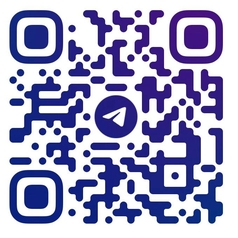

In [ ]:
# #vibo: пример пересылки картинки в другую группу
# #vibo: https://qna.habr.com/q/509409

# @bot.message_handler(content_types=["text", "sticker", "pinned_message", "photo", "audio"])
# def echo_msg(message):
#     if message.content_type == 'text':
#         bot.send_message(chatID, "Запрос от\n*{name} {last}*\n{text}".format(name=message.chat.first_name, last=message.chat.last_name, text=message.text), parse_mode="Markdown") #от кого идет сообщение и его содержание
#         bot.send_message(message.chat.id, "*{name}!*\n\nСпасибо за инфу".format(name=message.chat.first_name, last=message.chat.last_name, text=message.text), parse_mode="Markdown") #то что пойдет юзеру после отправки сообщения

#     elif message.content_type == 'photo':
#             raw = message.photo[2].file_id
#             name = raw+".jpg"
#             file_info = bot.get_file(raw)
#             downloaded_file = bot.download_file(file_info.file_path)
#             with open(name,'wb') as new_file:
#                 new_file.write(downloaded_file)
#             img = open(name, 'rb')
#             bot.send_message(chatID, "Запрос от\n*{name} {last}*".format(name=message.chat.first_name, last=message.chat.last_name), parse_mode="Markdown") #от кого идет сообщение и его содержание
#             bot.send_photo(chatID, img)
#             bot.send_message(message.chat.id, "*{name}!*\n\nСпасибо за инфу".format(name=message.chat.first_name, last=message.chat.last_name, text=message.text), parse_mode="Markdown") #то что пойдет юзеру после отправки сообщения


### ИТОГОВЫЙ ПРОЕКТ

#### Telebot

In [ ]:
#vibo: устанавливаем библиотеку для работы с telebot
!pip install pytelegrambotapi

In [ ]:
#vibo: устанавливаем загрузчик с google-drive
!pip install googledrivedownloader

In [ ]:
#vibo: устанавливаем emoji
!pip install emoji

In [ ]:
#vibo: импортируем библиотеки для работы с ботом и обработки изображений + смайлы
import telebot
from telebot import types
from PIL import Image
import emoji

#vibo: загружаем библиотеку для загрузки файлов в colab
from google_drive_downloader import GoogleDriveDownloader as gdd

In [ ]:
#vibo: региструю бот для получения его токена

#vibo: идем на @botfarther в telegram 
#vibo: регистрируем нового бота - /newbot
#vibo: выбираем имя для бота - NST_vibo
#vibo: выбираем имя пользователя для бота (должно заканчиваться на _bot) - NST_vibo_bot
#vibo: полученный токен сохраняем

In [ ]:
#vibo: подключаем токен бота
bot = telebot.TeleBot('5262420063:AAEurVTkgPuxoAHZSaekJ-3k8AdWV4Ec3H0')

In [ ]:
#vibo: тело бота-2 с примером

#vibo: добавляем типы данных для работы в telebot
@bot.message_handler(content_types=['text', 'photo'])

#vibo: приветствие с первым меню выбора
def start(message):
    if message.text == '/start':
        bot.send_message(message.from_user.id, emoji.emojize('Привет! Я, Neural Style Transfer Bot!', use_aliases=True))
        bot.send_message(message.from_user.id, emoji.emojize('Я умею переносить стиль с одной картинки на другую.', use_aliases=True))

        #vibo: реализуем кнопки выбора для первого меню (пример или начало работы)
        #vibo: клавиатура
        keyboard_1 = types.InlineKeyboardMarkup()
        #vibo: кнопка выбора примера
        key_yes_1 = types.InlineKeyboardButton(text=emoji.emojize('Посмотреть пример', use_aliases=True), callback_data='yes_1')
        #vibo: добавляем кнопку в клавиатуру
        keyboard_1.add(key_yes_1)
        #vibo: кнопка начала работы
        key_no_1= types.InlineKeyboardButton(text=emoji.emojize('Начать работу', use_aliases=True), callback_data='no_1')
        #vibo: добавляем кнопку в клавиатуру
        keyboard_1.add(key_no_1)

        #vibo: диалоговый запрос перед кнопками
        question = emoji.emojize('Можешь посмотреть заготовленный пример или сразу перейти к загрузке своих изображений:', use_aliases=True)
        bot.send_message(message.from_user.id, text=question, reply_markup=keyboard_1)

#vibo: получаем первое изображение (content_image), запрашиваем второе изображение (style_image)
def get_content(message):
    #vibo: сохраняем полученный файл
    raw = message.photo[2].file_id
    name = raw+".jpg"
    file_info = bot.get_file(raw)
    downloaded_file = bot.download_file(file_info.file_path)
    with open("content_image.jpg", 'wb') as new_file:
        new_file.write(downloaded_file)

    bot.send_message(message.from_user.id, emoji.emojize('Ок! Эту картинку будем раскрашивать.', use_aliases=True))
    bot.send_message(message.from_user.id, emoji.emojize('Теперь загрузи вторую:', use_aliases=True))
    #vibo: переходим на следующий шаг get_style
    bot.register_next_step_handler(message, get_style)

#vibo: получаем второе изображение (style_image)
def get_style(message):
    #vibo: сохраняем второе изображение
    raw = message.photo[2].file_id
    name = raw+".jpg"
    file_info = bot.get_file(raw)
    downloaded_file = bot.download_file(file_info.file_path)
    with open("style_image.jpg", 'wb') as new_file:
        new_file.write(downloaded_file)

    bot.send_message(message.from_user.id, emoji.emojize('Эту картинку используем в качестве стиля.', use_aliases=True))

    #vibo: реализуем кнопки выбора для запуска переноса стиля
    keyboard_2 = types.InlineKeyboardMarkup() #наша клавиатура
    key_yes_2 = types.InlineKeyboardButton(text=emoji.emojize('Да, поехали!', use_aliases=True), callback_data='yes_2')
    keyboard_2.add(key_yes_2) #добавляем кнопку в клавиатуру
    key_no_2 = types.InlineKeyboardButton(text=emoji.emojize('Нет, поменяю картинки', use_aliases=True), callback_data='no_2')
    keyboard_2.add(key_no_2)
    question = emoji.emojize('Все готово для старта! Начинаем перенос стиля?', use_aliases=True)
    bot.send_message(message.from_user.id, text=question, reply_markup=keyboard_2)

#vibo: метод-обработчик
@bot.callback_query_handler(func=lambda call: True)
def callback_worker(call):
      
    #vibo: callback_data для клавиатуры-1
    if call.data == "yes_1":
        
        #vibo: скачиваем изображения с примерами из google-drive (папка расшарена) и грузим в чат
        bot.send_message(call.message.chat.id, emoji.emojize('Берем первую картинку:', use_aliases=True))
        gdd.download_file_from_google_drive(file_id='1b7jWjSJ0MZuoXdHGuiJV2Wj395S5C6u1', dest_path = '/content/file1.jpeg')
        image1 = Image.open('/content/file1.jpeg')
        bot.send_photo(call.message.chat.id, image1)

        bot.send_message(call.message.chat.id, emoji.emojize('Выбираем вторую, ее используем для переноса стиля:', use_aliases=True))
        gdd.download_file_from_google_drive(file_id='1FPvVTr__mVSqfMOYyb5cdwfnKWmZ8c4U', dest_path = '/content/file2.jpeg')
        image2 = Image.open('/content/file2.jpeg')
        bot.send_photo(call.message.chat.id, image2)
        
        bot.send_message(call.message.chat.id, emoji.emojize('Смотрим, что получилось:', use_aliases=True))
        gdd.download_file_from_google_drive(file_id='1wcJc8nVC2gFkBR9R87yqlxnv0z6dKcPq', dest_path = '/content/file3.jpeg')
        image3 = Image.open('/content/file3.jpeg')
        bot.send_photo(call.message.chat.id, image3)
      
        bot.send_message(call.message.chat.id, emoji.emojize("Пора действовать. Теперь можешь загрузить свою первую картинку:", use_aliases=True))      
        #vibo: переход на следующий шаг с запуском get_content
        bot.register_next_step_handler(call.message, get_content)

    #vibo: callback_data для клавиатуры-2
    elif call.data == "no_1":
        bot.send_message(call.message.chat.id, emoji.emojize("Загрузи свою первую картинку:", use_aliases=True))      
        #vibo: переход на следующий шаг с запуском get_content
        bot.register_next_step_handler(call.message, get_content)

    #vibo: callback_data, которую мы указали при объявлении кнопки
    elif call.data == "yes_2": 
        bot.send_message(call.message.chat.id, emoji.emojize('Ок. Начинаю переносить стиль.', use_aliases=True))
        bot.send_message(call.message.chat.id, emoji.emojize('Нужно подождать... :coffee:?', use_aliases=True))
        bot.send_message(call.message.chat.id, emoji.emojize('Здесь должен быть progress-bar... но его пока нет', use_aliases=True))
        
        #vibo: запуск модели для переноса стиля
        #vibo: читает файлы, полученные от пользователя, сохраненные в colab
        #vibo: сохраняет в colab файл с перенесенным стилем 
        nst_model_1()

        #vibo: читаем полученный файл после преобразования                                                       
        output_image = Image.open('/content/output_image.jpg')
        #vibo: отправляем полученное изображение в чат
        bot.send_photo(call.message.chat.id, output_image)
        bot.send_message(call.message.chat.id, emoji.emojize('Готово! Чтобы перезапустить бота нажми /start', use_aliases=True))

    #vibo: возвращаем пользователя в начало
    elif call.data == "no_2":
        bot.send_message(call.message.chat.id, emoji.emojize("Загрузи свою первую картинку:", use_aliases=True))      
        #vibo: переход на следующий шаг с запуском get_content
        bot.register_next_step_handler(call.message, get_content)

    else:
        pass

#### Модель-1

In [ ]:
#vibo: устанавливаем pystiche - фреймворк для NST
!pip install pystiche

In [ ]:
#vibo: импортируем библиотеки
import torch
import pystiche
from pystiche import demo, enc, loss, ops, optim
import torchvision.transforms as transforms
from PIL import Image

#vibo: выбор девайса на котором будем производить расчет
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
#vibo: загружаем encoder c архитектурой VGG19
multi_layer_encoder = enc.vgg19_multi_layer_encoder()

In [ ]:
#vibo: определяем слои для content_layer, передаем в encoder, считаем content_loss
content_layer = "relu4_2"
encoder = multi_layer_encoder.extract_encoder(content_layer)
content_loss = pystiche.loss.FeatureReconstructionLoss(encoder)

In [ ]:
#vibo: определяем слои для style_layers
style_layers = ("relu1_1", "relu2_1", "relu3_1", "relu4_1", "relu5_1")
#vibo: управление 'фокусом' выходного изображения
style_weight = 1e3

def get_encoding_op(encoder, layer_weight):
    return pystiche.loss.GramLoss(encoder, score_weight=layer_weight)

#vibo: считаем style_loss
style_loss = pystiche.loss.MultiLayerEncodingLoss(multi_layer_encoder, style_layers, get_encoding_op, score_weight=style_weight)

In [ ]:
#vibo: оптимизация
criterion = loss.PerceptualLoss(content_loss, style_loss).to(device)
print(criterion)

In [ ]:
def nst_model_1():
  #vibo: читаем полученную от пользователя первую картинку
  content_image = Image.open('/content/content_image.jpg')
  
  #vibo: задаем преобразования - изменяем размер картинки, обрезаем ее по центру, преобразуем в тензор
  transforms_image=transforms.Compose([transforms.Resize(512), transforms.CenterCrop(512), transforms.ToTensor()])
 
  #vibo: преобразуем content_image, переностим на device
  content_image=transforms_image(content_image)
  criterion.set_content_image(content_image.to(device))

  #vibo: читаем вторую, полученную от пользователя картинку
  style_image = Image.open('/content/style_image.jpg')
  
  #vibo: преобразуем style_image,  переностим на device
  style_image=transforms_image(style_image)
  criterion.set_style_image(style_image.to(device))

  #vibo: берем content_image как input_image
  input_image = content_image.to(device).clone()
  #vibo: получаем output_image
  output_image = optim.image_optimization(input_image, criterion, num_steps=500)

  #vibo: задаем преобразование к PIL изображению
  unloader = transforms.ToPILImage()
  #vibo: преобразовываем в картинку
  output_image = unloader(output_image)
  #vibo: сохраняем
  output_image.save('output_image.jpg')

#### Модель-2

#### ЗАПУСК БОТА

In [ ]:
#vibo: используем ссылку https://t.me/NST_vibo_bot

In [ ]:
#vibo: или qr-code

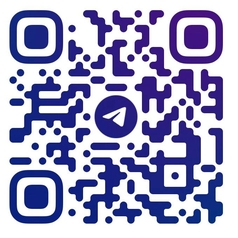

In [ ]:
#vibo: ЗАПУСКАЕМ БОТ
bot.polling(none_stop=True, interval=0)